In [1]:
from merlion.utils import TimeSeries
from ts_datasets.anomaly import NAB

# Data loader returns pandas DataFrames, which we convert to Merlion TimeSeries
time_series, metadata = NAB(subset="realKnownCause")[3]
train_data = TimeSeries.from_pd(time_series[metadata.trainval])
test_data = TimeSeries.from_pd(time_series[~metadata.trainval])
test_labels = TimeSeries.from_pd(metadata.anomaly[~metadata.trainval])


NAB Download: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]
Time series /home/kisalay/Merlion/data/nab/realKnownCause/ec2_request_latency_system_failure.csv (index 2) has timestamp duplicates. Kept first values.
Time series /home/kisalay/Merlion/data/nab/realKnownCause/machine_temperature_system_failure.csv (index 3) has timestamp duplicates. Kept first values.


In [2]:
from merlion.models.defaults import DefaultDetectorConfig, DefaultDetector
model = DefaultDetector(DefaultDetectorConfig())
model.train(train_data=train_data)
test_pred = model.get_anomaly_label(time_series=test_data)


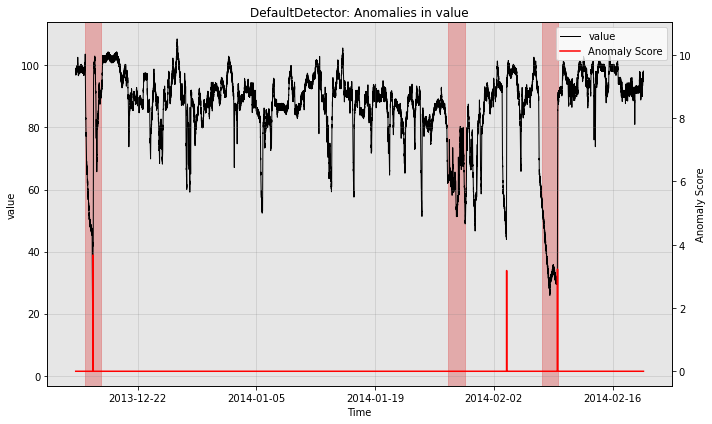

In [3]:
from merlion.plot import plot_anoms
import matplotlib.pyplot as plt
fig, ax = model.plot_anomaly(time_series=test_data)
plot_anoms(ax=ax, anomaly_labels=test_labels)
plt.show()


In [4]:
from merlion.evaluate.anomaly import TSADMetric
p = TSADMetric.Precision.value(ground_truth=test_labels, predict=test_pred)
r = TSADMetric.Recall.value(ground_truth=test_labels, predict=test_pred)
f1 = TSADMetric.F1.value(ground_truth=test_labels, predict=test_pred)
mttd = TSADMetric.MeanTimeToDetect.value(ground_truth=test_labels, predict=test_pred)
print(f"Precision: {p:.4f}, Recall: {r:.4f}, F1: {f1:.4f}\n"
      f"Mean Time To Detect: {mttd}")


Precision: 0.6667, Recall: 0.6667, F1: 0.6667
Mean Time To Detect: 1 days 10:30:00


In [5]:
from merlion.utils import TimeSeries
from ts_datasets.forecast import M4

# Data loader returns pandas DataFrames, which we convert to Merlion TimeSeries
time_series, metadata = M4(subset="Hourly")[0]
train_data = TimeSeries.from_pd(time_series[metadata.trainval])
test_data = TimeSeries.from_pd(time_series[~metadata.trainval])


100%|██████████| 414/414 [00:01<00:00, 395.07it/s]
